In [52]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


In [72]:
path_dir = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take"
# file_path = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take\\1mm.dat"


fields_df = pd.DataFrame({'B':[], 'X':[], 'Y':[], 'Z':[]})

for address, dirs, files in os.walk(path_dir):
    for file in files:
        if ".dat" in str(file):
            z = re.search(r'([0-9]+)',file)
            z_coord = z[0]
            file_path = os.path.join(address,file)

            field_i = pd.read_csv(file_path,encoding = 'unicode_escape',delimiter='\t',names= ['B','X','Y'],skiprows=[0])
            field_i['Z'] = int(z_coord)

            fields_df = pd.concat([fields_df,field_i])
            # print(field_i['B'])



# print(fields_df)
# fields_df['B'].plot()
# plt.show()



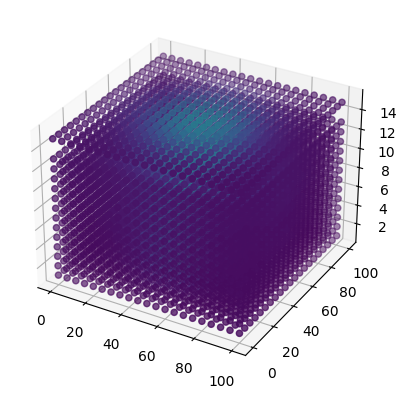

In [74]:

fields_np = fields_df.to_numpy()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs = fields_np[:,1],ys =fields_np[:,2],zs = fields_np[:,3], c=fields_np[:,0])

In [77]:
fig = px.scatter_3d(fields_df, x='X', y='Y', z='Z', color='B', opacity=0.05)
fig.show()